In [1]:
import geopandas as  gpd
import pandas as pd
import numpy as np
import datetime
import glob
import matplotlib.pyplot as plt
from rasterstats import zonal_stats

# Data srtructure

In [2]:
forecast = pd.DataFrame(columns=['date', "mean", "std"])

# WRF Primeras 72 HS

In [3]:
files_A = glob.glob('../data/cuencas/cuencas_CBA_A_*') 
files_B = glob.glob('../data/cuencas/cuencas_CBA_B_*') 
files_C = glob.glob('../data/cuencas/cuencas_CBA_C_*')
files_D = glob.glob('../data/cuencas/cuencas_CBA_D_*') 

In [4]:
c24A = pd.read_csv(files_A[0])
c48A = pd.read_csv(files_A[1])
c72A = pd.read_csv(files_A[2])
c24B = pd.read_csv(files_B[0])
c48B = pd.read_csv(files_B[1])
c72B = pd.read_csv(files_B[2])
c24C = pd.read_csv(files_C[0])
c48C = pd.read_csv(files_C[1])
c72C = pd.read_csv(files_C[2])
c24D = pd.read_csv(files_D[0])
c48D = pd.read_csv(files_D[1])
c72D = pd.read_csv(files_D[2])

In [5]:
#str.match(r'*{Tercero}')==True
c24A.loc[c24A["subcuenca"].str.contains('Tercero')]

,subcuenca,cuenca,count,max,mean,min
49,41-Cuenca R. Tercero (Ctalamochita),Río Carcarañá,275,0.03,0.0,0.0


In [6]:
mA24 = c24A.loc[c24A["subcuenca"].str.contains('Tercero')]['mean']
mA48 = c48A.loc[c48A["subcuenca"].str.contains('Tercero')]['mean']
mA72 = c72A.loc[c72A["subcuenca"].str.contains('Tercero')]['mean']
mB24 = c24B.loc[c24B["subcuenca"].str.contains('Tercero')]['mean']
mB48 = c48B.loc[c48B["subcuenca"].str.contains('Tercero')]['mean']
mB72 = c72B.loc[c72B["subcuenca"].str.contains('Tercero')]['mean']
mC24 = c24C.loc[c24C["subcuenca"].str.contains('Tercero')]['mean']
mC48 = c48C.loc[c48C["subcuenca"].str.contains('Tercero')]['mean']
mC72 = c72C.loc[c72C["subcuenca"].str.contains('Tercero')]['mean']
mD24 = c24D.loc[c24D["subcuenca"].str.contains('Tercero')]['mean']
mD48 = c48D.loc[c48D["subcuenca"].str.contains('Tercero')]['mean']
mD72 = c72D.loc[c72D["subcuenca"].str.contains('Tercero')]['mean']

In [7]:
m24 = pd.concat([mA24, mB24, mC24, mD24], ignore_index=True)
m48 = pd.concat([mA48, mB48, mC48, mD48], ignore_index=True)
m72 = pd.concat([mA72, mB72, mC72, mD72], ignore_index=True)

In [8]:
date = datetime.datetime.strptime("2021-03-01", "%Y-%m-%d")
mean = m24.mean()
std = m24.std()
temp = pd.DataFrame(data = {'date': [date], "mean": [mean], "std":[std]})

In [9]:
forecast = forecast.append(temp)

In [10]:
date = datetime.datetime.strptime("2021-03-02", "%Y-%m-%d")
mean = (m48).mean()
std = (m48).std()
temp = pd.DataFrame(data = {'date': [date], "mean": [mean], "std":[std]})

In [11]:
forecast = forecast.append(temp)

In [12]:
date = datetime.datetime.strptime("2021-03-03", "%Y-%m-%d")
mean = (m72).mean()
std = (m72).std()
temp = pd.DataFrame(data = {'date': [date], "mean": [mean], "std":[std]})

In [13]:
forecast = forecast.append(temp)

In [14]:
forecast

,date,mean,std
0,2021-03-01,0.0075,0.015000
0,2021-03-02,0.0425,0.078475
0,2021-03-03,0.0050,0.005774


In [15]:
dateA = datetime.datetime.strptime("2021-02-23", "%Y-%m-%d")
dateB = datetime.datetime.strptime("2021-02-24", "%Y-%m-%d")
dateC = datetime.datetime.strptime("2021-02-25", "%Y-%m-%d")

In [16]:
date = pd.DataFrame({'date': [dateA, dateB, dateC]})

# preparar para integrar

In [17]:
wrf = pd.DataFrame({'wrfA':[mA24.values[0], mA48.values[0], mA72.values[0]],
              'wrfB':[mB24.values[0], mB48.values[0], mB72.values[0]],
              'wrfC':[mC24.values[0], mC48.values[0], mC72.values[0]],
              'wrfD':[mD24.values[0], mD48.values[0], mD72.values[0]]})

In [18]:
wrf['date'] = date['date']


In [19]:
wrf

,wrfA,wrfB,wrfC,wrfD,date
0,0.00,0.0,0.03,0.0,2021-02-23
1,0.16,0.0,0.01,0.0,2021-02-24
2,0.01,0.0,0.01,0.0,2021-02-25


# DÍA 4 A 16

## GFS

In [20]:
filelist = glob.glob("../data/csv/GFS_*_ppm_all_day.csv")

In [21]:
gfs = pd.read_csv(filelist[0])

In [22]:
gfs.head()

,date,mean
0,2021-03-01,0.072402
1,2021-03-02,0.120576
2,2021-03-03,0.122145
3,2021-03-04,0.144997
4,2021-03-05,0.225103


## GEFS

In [23]:
filelist = glob.glob("../data/csv/GEFS_*_ppm_all_day.csv")

In [24]:
len(filelist)

30

In [25]:
full_df = pd.DataFrame()

In [26]:
list_of_df = []

for file in range(30):
    # vars()[str(file)] = pd.read_csv(filelist[file])
    # vars()[] = pd.read_csv(file)
    vars()[f"gefs{file}"] = pd.read_csv(filelist[file])
    full_df[f"gefs{file}"] = vars()[f"gefs{file}"]['mean']

In [27]:
full_df.head()

,gefs0,gefs1,gefs2,gefs3,gefs4,gefs5,gefs6,gefs7,gefs8,gefs9,...,gefs20,gefs21,gefs22,gefs23,gefs24,gefs25,gefs26,gefs27,gefs28,gefs29
0,0.030953,0.110494,0.006914,0.513045,0.348623,0.007407,0.006996,1.908457,0.018677,0.100148,...,0.013951,0.186084,0.091210,0.001056,0.038790,0.039019,0.012613,0.572152,1.138924,0.037457
1,0.000000,0.009506,0.000988,0.000494,0.003012,0.003951,0.000000,0.000988,0.010134,0.001975,...,0.001481,0.000494,0.000000,0.000000,0.000988,0.000000,0.000642,0.004247,0.000000,0.000494
2,0.000494,0.000000,0.002469,0.000000,0.000000,0.000000,0.237901,0.000000,0.000988,0.023453,...,0.829187,0.193076,0.000000,0.002963,1.839323,0.000000,0.000000,0.058940,0.002469,0.045004
3,0.557922,0.000000,0.447189,0.044856,0.000000,0.000840,1.059918,0.000000,0.000000,0.013951,...,2.047860,1.724877,0.019239,0.025440,2.494621,0.000000,0.000000,0.033457,0.001481,0.023519
4,0.065556,0.000000,0.034321,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019239,...,0.806228,0.000000,0.000000,0.000000,0.071893,0.000000,0.000000,0.000000,0.000494,0.000000


In [28]:
forecastGEFS = pd.DataFrame()

In [29]:
for key in range(36):
    mean = full_df.iloc[key].mean()
    std = full_df.iloc[key].std()
    temp = pd.DataFrame(data={"mean": [mean], "std": [std]}, dtype=np.float32)
    forecastGEFS = forecastGEFS.append(temp, ignore_index=True)

In [30]:
forecastGEFS['date'] = gefs0['date']

In [31]:
forecastGEFS['date'] = pd.to_datetime(forecastGEFS['date'])

In [32]:
forecastGEFS.head(2)

,mean,std,date
0,0.250408,0.441922,2021-03-01
1,0.002007,0.002986,2021-03-02


### Prueba de mezclar GEFS y GFS y WRF

In [33]:
full_df['gfs'] = gfs['mean']
full_df['wrfA'] = wrf['wrfA']
full_df['wrfB'] = wrf['wrfB']
full_df['wrfC'] = wrf['wrfC']
full_df['wrfD'] = wrf['wrfD']

In [34]:
full_df.head(6)

,gefs0,gefs1,gefs2,gefs3,gefs4,gefs5,gefs6,gefs7,gefs8,gefs9,...,gefs25,gefs26,gefs27,gefs28,gefs29,gfs,wrfA,wrfB,wrfC,wrfD
0,0.030953,0.110494,0.006914,0.513045,0.348623,0.007407,0.006996,1.908457,0.018677,0.100148,...,0.039019,0.012613,0.572152,1.138924,0.037457,0.072402,0.00,0.0,0.03,0.0
1,0.000000,0.009506,0.000988,0.000494,0.003012,0.003951,0.000000,0.000988,0.010134,0.001975,...,0.000000,0.000642,0.004247,0.000000,0.000494,0.120576,0.16,0.0,0.01,0.0
2,0.000494,0.000000,0.002469,0.000000,0.000000,0.000000,0.237901,0.000000,0.000988,0.023453,...,0.000000,0.000000,0.058940,0.002469,0.045004,0.122145,0.01,0.0,0.01,0.0
3,0.557922,0.000000,0.447189,0.044856,0.000000,0.000840,1.059918,0.000000,0.000000,0.013951,...,0.000000,0.000000,0.033457,0.001481,0.023519,0.144997,NaN,NaN,NaN,NaN
4,0.065556,0.000000,0.034321,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019239,...,0.000000,0.000000,0.000000,0.000494,0.000000,0.225103,NaN,NaN,NaN,NaN
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.925226,0.000000,0.225103,NaN,NaN,NaN,NaN


In [35]:
forecastGEFS2 = pd.DataFrame()
for key in range(30):
    mean = full_df.iloc[key].mean()
    std = full_df.iloc[key].std()
    median = full_df.iloc[key].median()
    temp = pd.DataFrame(data={"mean": [mean], "std": [std], "median": [median]}, dtype=np.float32)
    forecastGEFS2 = forecastGEFS2.append(temp, ignore_index=True)

In [36]:
forecastGEFS2['date'] = gefs0['date']
forecastGEFS2['date'] = pd.to_datetime(forecastGEFS2['date'])
forecastGEFS2.set_index('date')

,mean,std,median
date,,,
2021-03-01,0.217561,0.416363,0.039019
2021-03-02,0.010022,0.033034,0.000988
2021-03-03,0.098262,0.336500,0.001037
2021-03-04,0.314868,0.645449,0.019239
2021-03-05,0.148490,0.431033,0.000000
2021-03-06,0.166607,0.884084,0.000000
2021-03-07,0.710154,3.831913,0.000000
2021-03-08,0.074330,0.350249,0.000000
2021-03-09,0.013243,0.045969,0.000000


In [37]:
forecastGEFS2["max"] = forecastGEFS2["mean"] + forecastGEFS2["std"]
forecastGEFS2["min"] = forecastGEFS2["mean"] - forecastGEFS2["std"]

In [38]:
forecastGEFS2 = forecastGEFS2.set_index('date')

In [39]:
forecastGEFS2

,mean,std,median,max,min
date,,,,,
2021-03-01,0.217561,0.416363,0.039019,0.633924,-0.198802
2021-03-02,0.010022,0.033034,0.000988,0.043056,-0.023012
2021-03-03,0.098262,0.336500,0.001037,0.434762,-0.238238
2021-03-04,0.314868,0.645449,0.019239,0.960317,-0.330581
2021-03-05,0.148490,0.431033,0.000000,0.579524,-0.282543
2021-03-06,0.166607,0.884084,0.000000,1.050691,-0.717477
2021-03-07,0.710154,3.831913,0.000000,4.542067,-3.121759
2021-03-08,0.074330,0.350249,0.000000,0.424580,-0.275919
2021-03-09,0.013243,0.045969,0.000000,0.059212,-0.032726


In [40]:
forecastGEFS2.iloc[1]['mean']

0.010022281

In [41]:
temp =  pd.DataFrame(columns=['accum'])
for key, item in forecastGEFS2.iterrows():
    key1 = key - 1 # datetime.timedelta(days=1)
    # print(key)
    if key == 0:
        temp = temp.append({'accum': forecastGEFS2.iloc[key]['mean']}, ignore_index=True) 
    else:
        temp = temp.append({'accum': temp.iloc[key1]['accum'] + forecastGEFS2.iloc[key]['mean']}, ignore_index=True)
        # temp.iloc[key]['accum'] = temp.iloc[key1]['accum'] + forecastGEFS2.iloc[key]['mean']
    


TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [ ]:
(key - datetime.timedelta(days=1)).strptime

In [ ]:
tempmed =  pd.DataFrame(columns=['accummed'])
for key, item in forecastGEFS2.iterrows():
    key1 = key - 1 # datetime.timedelta(days=1)
    #print(item)
    if key == 0:
        tempmed = tempmed.append({'accummed': forecastGEFS2.iloc[key]['median']}, ignore_index=True) 
    else:
        tempmed = tempmed.append({'accummed': tempmed.iloc[key1]['accummed'] + forecastGEFS2.iloc[key]['median']}, ignore_index=True)
        # temp.iloc[key]['accum'] = temp.iloc[key1]['accum'] + forecastGEFS2.iloc[key]['mean']

In [ ]:
temp['accmin'] = temp['accum'] - forecastGEFS2['std']
temp['accmax'] = temp['accum'] + forecastGEFS2['std']

In [43]:
forecastGEFS2['min'].loc[forecastGEFS2['min'] <0] = 0

In [44]:
forecastGEFS2

,mean,std,median,max,min
date,,,,,
2021-03-01,0.217561,0.416363,0.039019,0.633924,0.0
2021-03-02,0.010022,0.033034,0.000988,0.043056,0.0
2021-03-03,0.098262,0.336500,0.001037,0.434762,0.0
2021-03-04,0.314868,0.645449,0.019239,0.960317,0.0
2021-03-05,0.148490,0.431033,0.000000,0.579524,0.0
2021-03-06,0.166607,0.884084,0.000000,1.050691,0.0
2021-03-07,0.710154,3.831913,0.000000,4.542067,0.0
2021-03-08,0.074330,0.350249,0.000000,0.424580,0.0
2021-03-09,0.013243,0.045969,0.000000,0.059212,0.0


In [45]:
temp = temp.set_index("date")

KeyError: "None of ['date'] are in the columns"

## PLOT

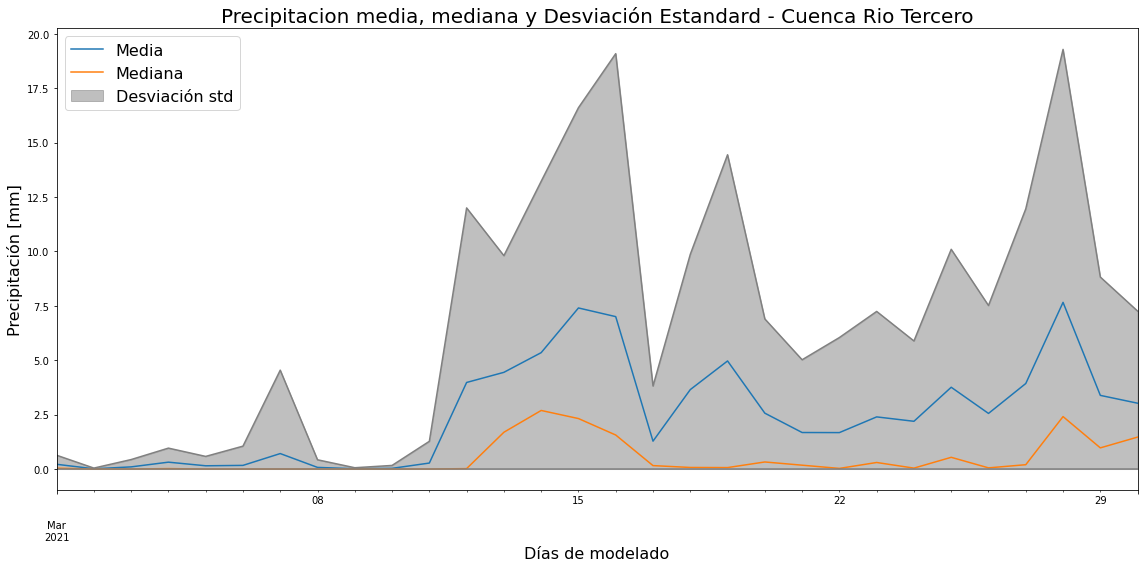

In [46]:
fig, ax = plt.subplots( 1, 1, figsize=(16,8) )
forecastGEFS2['mean'].plot(ax=ax, label = 'Media')
forecastGEFS2['median'].plot(ax=ax, label = 'Mediana')
#ax.plot(forecastGEFS2['mean'], color='blue', linewidth=2 )
ax.fill_between(x = forecastGEFS2.index, y1=forecastGEFS2['max'], y2=forecastGEFS2['min'], color='gray', label = 'Desviación std', alpha=0.5)
ax.set_title("Precipitacion media, mediana y Desviación Estandard - Cuenca Rio Tercero", fontsize=20)
ax.errorbar(forecastGEFS2.index, forecastGEFS2['max'], color='grey')
ax.errorbar(forecastGEFS2.index, forecastGEFS2['min'], color='grey')
ax.legend(fontsize = 16)
plt.xlabel("Días de modelado", fontsize=16)
plt.ylabel("Precipitación [mm]", fontsize=16)
plt.tight_layout()
plt.savefig("mean.png", dpi=150)

In [ ]:
forecastGEFS2.head()

In [47]:
full_df.index = forecastGEFS['date']

In [48]:
full_df.head()

,gefs0,gefs1,gefs2,gefs3,gefs4,gefs5,gefs6,gefs7,gefs8,gefs9,...,gefs25,gefs26,gefs27,gefs28,gefs29,gfs,wrfA,wrfB,wrfC,wrfD
date,,,,,,,,,,,,,,,,,,,,,
2021-03-01,0.030953,0.110494,0.006914,0.513045,0.348623,0.007407,0.006996,1.908457,0.018677,0.100148,...,0.039019,0.012613,0.572152,1.138924,0.037457,0.072402,0.00,0.0,0.03,0.0
2021-03-02,0.000000,0.009506,0.000988,0.000494,0.003012,0.003951,0.000000,0.000988,0.010134,0.001975,...,0.000000,0.000642,0.004247,0.000000,0.000494,0.120576,0.16,0.0,0.01,0.0
2021-03-03,0.000494,0.000000,0.002469,0.000000,0.000000,0.000000,0.237901,0.000000,0.000988,0.023453,...,0.000000,0.000000,0.058940,0.002469,0.045004,0.122145,0.01,0.0,0.01,0.0
2021-03-04,0.557922,0.000000,0.447189,0.044856,0.000000,0.000840,1.059918,0.000000,0.000000,0.013951,...,0.000000,0.000000,0.033457,0.001481,0.023519,0.144997,NaN,NaN,NaN,NaN
2021-03-05,0.065556,0.000000,0.034321,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019239,...,0.000000,0.000000,0.000000,0.000494,0.000000,0.225103,NaN,NaN,NaN,NaN


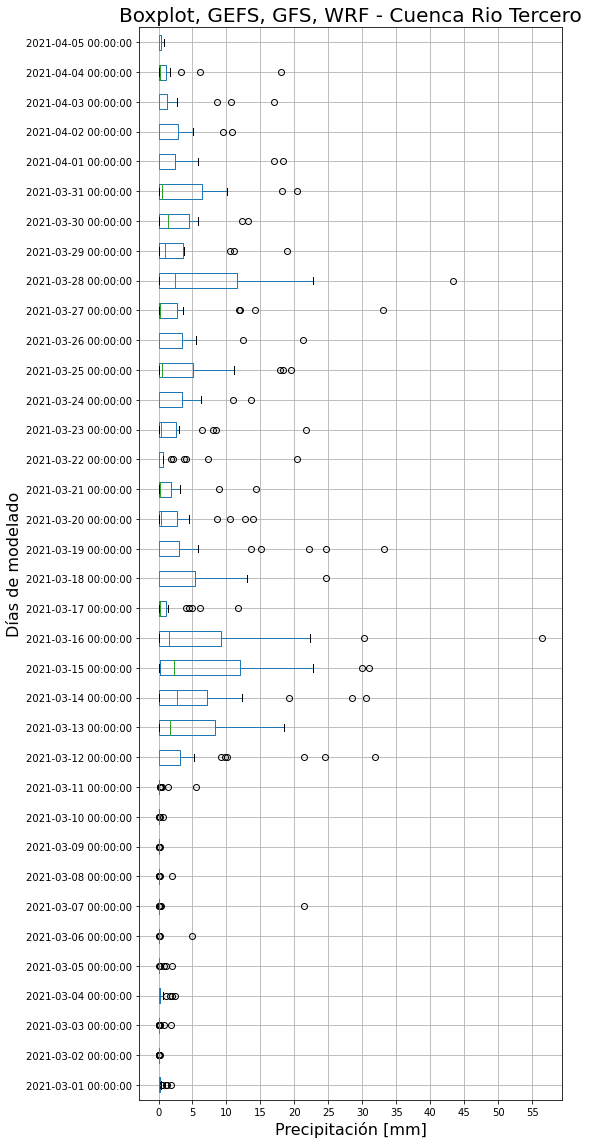

In [49]:
fig, ax1 = plt.subplots( 1, 1, figsize=(8,16) )
full_df.T.boxplot(ax=ax1, vert=False)
#ax.plot(forecastGEFS2['mean'], color='blue', linewidth=2 )
# ax.fill_between(x = temp.index, y1=temp['accmin'], y2=temp['accmax'], color='gray', alpha=0.5)
ax1.set_title("Boxplot, GEFS, GFS, WRF - Cuenca Rio Tercero", fontsize=20)
plt.ylabel("Días de modelado", fontsize=16)
plt.xlabel("Precipitación [mm]", fontsize=16)
plt.locator_params(axis='x', nbins=20)
plt.tight_layout()
plt.savefig("boxplot.png", dpi=150)

### Gamma

In [55]:
from scipy.stats import gamma

In [ ]:
full_df.plot.

### Porcentajes

In [50]:
suma = full_df.sum()

In [51]:
suma_df = pd.DataFrame()
suma_df['accum'] = suma

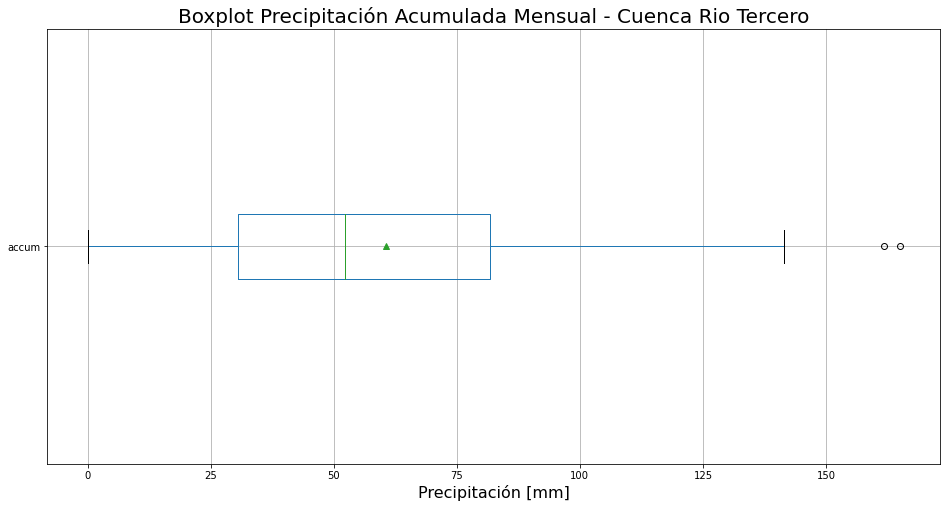

In [52]:
fig, ax4 = plt.subplots( 1, 1, figsize=(16,8) )
suma_df.boxplot(ax=ax4,  vert=False, showmeans=True)
ax4.set_title("Boxplot Precipitación Acumulada Mensual - Cuenca Rio Tercero", fontsize=20)
#plt.xlabel("Precipitación", fontsize=16)
plt.xlabel("Precipitación [mm]", fontsize=16)
plt.savefig("boxplot_acc.png", dpi=150)

In [53]:
D = {40: (len(suma.loc[suma >= 40])/30)*100,
     50: (len(suma.loc[suma >= 50])/30)*100,
     60: (len(suma.loc[suma >= 60])/30)*100,
     70: (len(suma.loc[suma >= 70])/30)*100,
     80: (len(suma.loc[suma >= 80])/30)*100,
     90: (len(suma.loc[suma >= 90])/30)*100,
     100: (len(suma.loc[suma >= 100])/30)*100,
     110: (len(suma.loc[suma >= 110])/30)*100,
     120: (len(suma.loc[suma >= 120])/30)*100,
     130: (len(suma.loc[suma >= 130])/30)*100,
     140: (len(suma.loc[suma >= 140])/30)*100,
     150: (len(suma.loc[suma >= 150])/30)*100,
     160: (len(suma.loc[suma >= 160])/30)*100,
     170: (len(suma.loc[suma >= 170])/30)*100}

In [ ]:
D

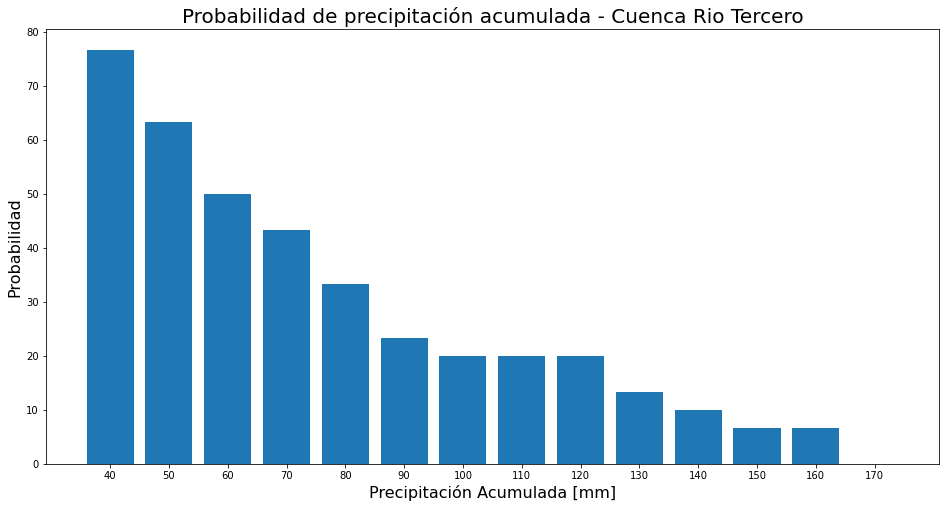

In [54]:
fig, ax2 = plt.subplots( 1, 1, figsize=(16,8) )
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
ax2.set_title("Probabilidad de precipitación acumulada - Cuenca Rio Tercero", fontsize=20)
plt.xlabel("Precipitación Acumulada [mm]", fontsize=16)
plt.ylabel("Probabilidad", fontsize=16)
plt.savefig("pacuumm.png", dpi=150)